In [18]:
# Data exploration

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


X_train = pd.read_csv("X_train.csv", header=None).values
X_test  = pd.read_csv("X_test.csv", header=None).values
y_train = pd.read_csv("y_train.csv", header=None).values
y_test  = pd.read_csv("y_test.csv", header=None).values

print("original：")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


original：
X_train: (80001, 400)
X_test : (20001, 400)
y_train: (80001, 1)
y_test : (20001, 1)


In [20]:

y_train_1d = y_train.ravel()
y_test_1d  = y_test.ravel()


print("y_train_1d:", y_train_1d.shape)
print("y_test_1d :", y_test_1d.shape)


y_train_1d: (80001,)
y_test_1d : (20001,)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled :", X_test_scaled.shape)


X_train_scaled: (80001, 400)
X_test_scaled : (20001, 400)


In [22]:
#GradientBoosting

In [23]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42,
    verbose=1   #
)


gb.fit(X_train_scaled, y_train_1d)

print("model finished ✅")


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3845           0.0014           27.22m
         2           1.3830           0.0011           26.04m
         3           1.3820           0.0022           25.52m
         4           1.3807           0.0005           25.22m
         5           1.3795           0.0006           24.95m
         6           1.3787           0.0013           24.72m
         7           1.3780           0.0017           24.51m
         8           1.3767          -0.0012           24.33m
         9           1.3764           0.0023           24.15m
        10           1.3759           0.0011           23.99m
        20           1.3714           0.0022           22.59m
        30           1.3687           0.0022           21.79m
        40           1.3667          -0.0024           20.73m
        50           1.3649          -0.0014           19.53m
        60           1.3642          -0.0019           18.28m
       

Test Accuracy: 0.5537
Test AUC:      0.5736


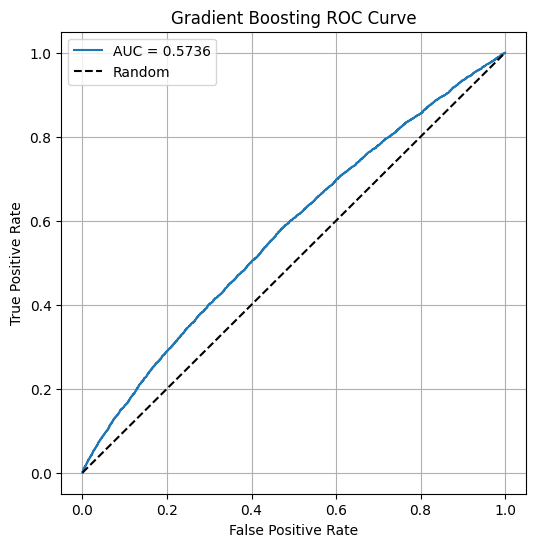

In [24]:

y_proba_test = gb.predict_proba(X_test_scaled)[:, 1]


y_pred_test = (y_proba_test > 0.5).astype(int)

acc = accuracy_score(y_test_1d, y_pred_test)
auc = roc_auc_score(y_test_1d, y_proba_test)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC:      {auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test_1d, y_proba_test)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
#we also try XGB

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [27]:
xgb_model.fit(
    X_train_scaled,
    y_train_1d,
    eval_set=[(X_train_scaled, y_train_1d),
              (X_test_scaled,  y_test_1d)],
    verbose=20
)

print("XGBoost finished  ✅")


[0]	validation_0-logloss:0.69214	validation_1-logloss:0.69224
[20]	validation_0-logloss:0.68406	validation_1-logloss:0.68572
[40]	validation_0-logloss:0.68085	validation_1-logloss:0.68466
[60]	validation_0-logloss:0.67845	validation_1-logloss:0.68447
[80]	validation_0-logloss:0.67622	validation_1-logloss:0.68457
[100]	validation_0-logloss:0.67399	validation_1-logloss:0.68454
[120]	validation_0-logloss:0.67203	validation_1-logloss:0.68459
[140]	validation_0-logloss:0.66993	validation_1-logloss:0.68465
[160]	validation_0-logloss:0.66783	validation_1-logloss:0.68471
[180]	validation_0-logloss:0.66580	validation_1-logloss:0.68464
[200]	validation_0-logloss:0.66375	validation_1-logloss:0.68486
[220]	validation_0-logloss:0.66180	validation_1-logloss:0.68508
[240]	validation_0-logloss:0.65983	validation_1-logloss:0.68512
[260]	validation_0-logloss:0.65797	validation_1-logloss:0.68531
[280]	validation_0-logloss:0.65613	validation_1-logloss:0.68539
[299]	validation_0-logloss:0.65435	validation_

XGBoost Test Accuracy: 0.5521
XGBoost Test AUC:      0.5705


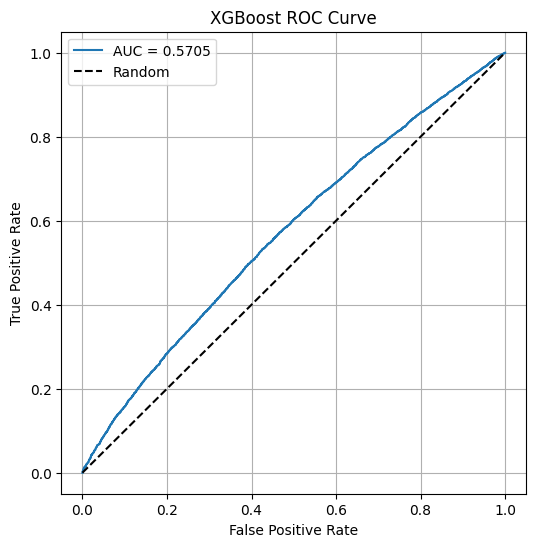

In [28]:

y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred  = (y_proba > 0.5).astype(int)

acc = accuracy_score(y_test_1d, y_pred)
auc = roc_auc_score(y_test_1d, y_proba)

print(f"XGBoost Test Accuracy: {acc:.4f}")
print(f"XGBoost Test AUC:      {auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test_1d, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#try to find a better parameter

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=20,
)


param_dist = {
    "n_estimators":     [200, 400, 600],
    "learning_rate":    [0.01, 0.03, 0.05, 0.1],
    "max_depth":        [3, 4, 5, 6],
    "subsample":        [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma":            [0, 0.1, 0.3],
    "reg_lambda":       [1, 3, 5],
    "reg_alpha":        [0, 0.1, 0.5],
}

# ---- RandomizedSearchCV ----
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


search.fit(
    X_train_scaled,
    y_train_1d,
    eval_set=[(X_test_scaled, y_test_1d)],
    verbose=False,
)

print("\nfinished")
print("best parameter：", search.best_params_)
print("best CV AUC：", search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


XGBoost (tuned) Test Accuracy: 0.5512
XGBoost (tuned) Test AUC:      0.5755


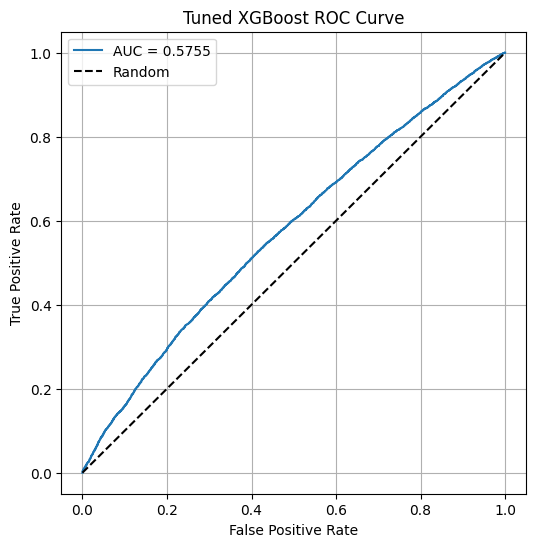

In [17]:
best_model = search.best_estimator_


y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred  = (y_proba > 0.5).astype(int)

acc = accuracy_score(y_test_1d, y_pred)
auc = roc_auc_score(y_test_1d, y_proba)

print(f"XGBoost (tuned) Test Accuracy: {acc:.4f}")
print(f"XGBoost (tuned) Test AUC:      {auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test_1d, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
